In [18]:
import pandas as pd
import numpy as np

In [19]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math

In [20]:
correlation_scores = pd.read_csv("logqvalues_pathwaysperprogenyresult.csv", index_col = "Pathway")

In [21]:
correlation_scores = -correlation_scores

In [22]:
sns.color_palette("Set3")[5]

(0.9921568627450981, 0.7058823529411765, 0.3843137254901961)

In [23]:
binaried = pd.DataFrame(np.where(correlation_scores > -np.log10(0.05), 1, 0))
binaried.columns = correlation_scores.columns
binaried.index = correlation_scores.index

In [24]:
binaried_nozeroes = binaried.loc[~(binaried==0).all(axis=1)]
binaried_nozeroes["sum"] = binaried_nozeroes.sum(axis =1)
top_50 = binaried_nozeroes[binaried_nozeroes["sum"] >1].index

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
top_correlations = correlation_scores.loc[top_50]

In [26]:
newcolumns = []
for item in top_correlations.columns:
    splititem = item.split("_")[1]
    newcolumns.append(splititem)

In [27]:
top_correlations.columns = newcolumns

In [28]:
plt.rcParams['figure.figsize'] = [8,18]
palette_cmap = sns.light_palette(sns.color_palette("Set3")[3], as_cmap = True)

In [29]:
labelled = (np.where(top_correlations > -np.log10(0.001), "***", ""))

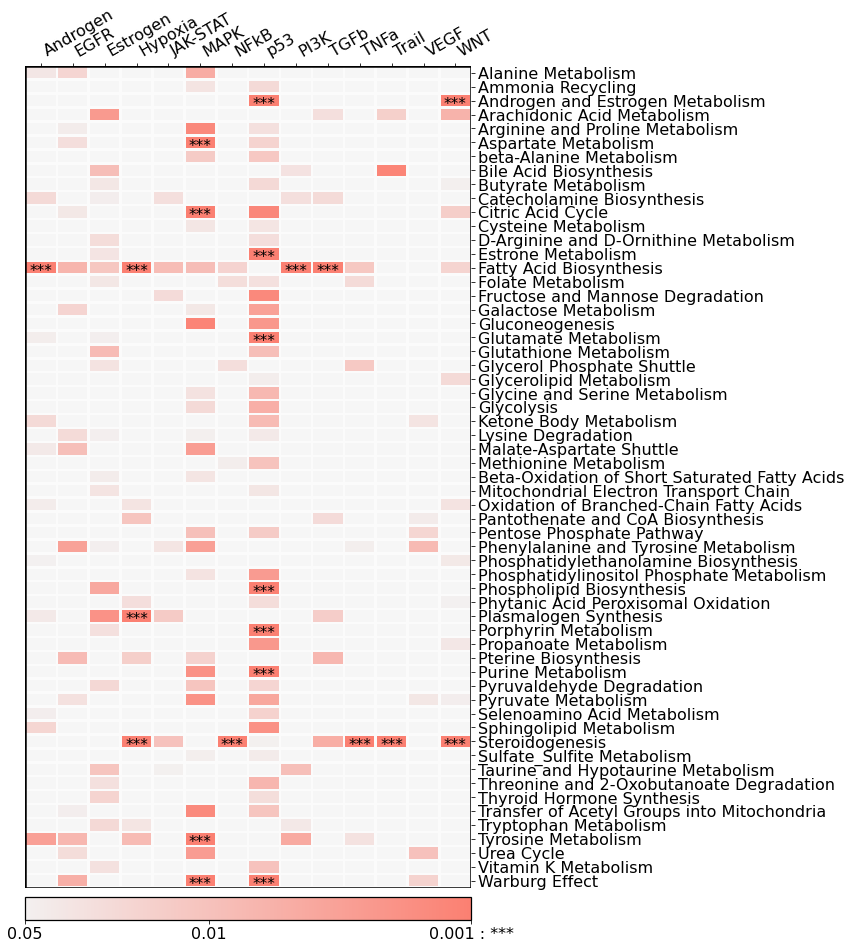

In [32]:
g = sns.heatmap(top_correlations, cmap = palette_cmap, yticklabels = True, xticklabels = True
                   , mask = top_correlations<-np.log10(0.05), vmin = -np.log10(0.05), vmax = -np.log10(0.001),
               lw = 1.5, linecolor="#fbfbfb", cbar_kws = dict(use_gridspec=False,location="bottom", pad = 0.01)
                ,annot = labelled, fmt = '', annot_kws={"size": 15, "color":"k", "va":"center"})
g.set_facecolor("#f6f6f6")

g.set_xlabel("")
g.set_ylabel("")

g.axhline(0, c="k", lw = 2.5)
g.axhline(top_correlations.shape[0], c="k", lw = 2.5)
g.axvline(0, c="k", lw = 2.5)
g.axvline(top_correlations.shape[1], c="k", lw = 2.5)

g.xaxis.tick_top() # x axis on top
g.xaxis.set_label_position('top')
g.set_xticklabels(g.get_xticklabels(), rotation =30, ha = "left", size = 16)

g.yaxis.tick_right() # x axis on top
g.yaxis.set_label_position('right')

g.set_yticklabels(g.get_yticklabels(), rotation =0, ha = "left", size = 16)



cbar = g.collections[0].colorbar
cbar.set_ticks([-np.log10(0.05), -np.log10(0.01), -np.log10(0.001)])
cbar.set_ticklabels(['0.05', '0.01', '0.001 : ***'])
cbar.ax.tick_params(labelsize=16)
cbar.outline.set_visible(True)
cbar.outline.set_linewidth(1.25)

for t in g.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0, 0.25,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )



plt.savefig("progeny_associations_kegg.pdf", bbox_inches = "tight")